## 0. Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import Callable
import matplotlib.animation as animation
from copy import deepcopy

## 1.0 Classe 

In [2]:
class Particle():
    
    def __init__(self, X, V, pbest) -> None:
        # Posição (X), velocidade (V) e posição de melhor resultado (X_best)
        self.X = X
        self.V = V
        self.pbest = pbest

        pass

## 2. Funções auxiliares

### 2.1 Função objetiva

In [3]:
def wheeler(x, y, a=1.5):
    # Mínimo global = 1 para x=1, y=3/2 (com a=1.5)
    result = -np.exp(-(x*y - a)**2 - (y - a)**2) 
    return result

def ackley(x,y, a=20, b=0.2, c=2*np.pi):
    # Mínimo global fica na origem (0,0)
    d = 2
    _sum_1 = x**2 + y**2
    _sum_2 = np.cos(c * x) + np.cos(c * y)
    result = -a * np.exp(-b * np.sqrt(_sum_1 / d)) - np.exp(_sum_2 / d) + a + np.exp(1)
    return result

In [4]:
def plot_wheeler():
    """
    Função para plotar função de Wheeler Ridge
    
    """
    
    # Definindo o intervalo dos valores de x e y
    x = np.linspace(0, 3, 100)
    y = np.linspace(0, 3, 100)

    # Criando uma grade de pontos para calcular os valores da função
    X, Y = (np.meshgrid(x, y))
    Z = wheeler(X, Y)

    # Criando a figura e os eixos
    fig, ax = plt.subplots()

    # Plotando o mapa de calor
    heatmap = ax.pcolormesh(X, Y, Z, cmap='viridis', alpha=0.8)
    plt.colorbar(heatmap, ax=ax)
    x_min = X.ravel()[Z.argmin()]
    y_min = Y.ravel()[Z.argmin()]
    plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
    contours = plt.contour(X, Y, Z, 10, colors='black', alpha=0.4)
    plt.clabel(contours, inline=True, fontsize=8, fmt="%.3f")

    ax.set_title('Wheeler')
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    return fig, ax

In [5]:
def atualiza_posicao_velocidade(X, V, w, c, r, pbest, gbest):
    """
    Atualiza a posição e a velocidade de uma partícula em um algoritmo de otimização por enxame de partículas.

    Args:
        X (array-like): Vetor representando a posição atual da partícula.
        V (array-like): Vetor representando a velocidade atual da partícula.
        w (float): Coeficiente de inércia que controla a influência da velocidade anterior na atual.
        c (list): Lista contendo os fatores de aceleração pessoal e coletiva, respectivamente.
        r (list): Lista contendo dois números aleatórios entre 0 e 1 para influenciar o movimento da partícula.
        pbest (array-like): Vetor representando a melhor posição alcançada pela partícula até o momento.
        gbest (array-like): Vetor representando a melhor posição alcançada por qualquer partícula do enxame.

    Returns:
        tuple: Uma tupla contendo o novo vetor de posição e o novo vetor de velocidade da partícula após a atualização.
    """
    
    V = w*V + c[0]*r[0]*(pbest - X) + c[1]*r[1]*(gbest - X)
    X = X + V
    return X, V

## 3. Particle Swarm Optimization

In [6]:
def partcile_swarm_optimization(k_max:int, particles:list, w:float, c:list, r:list, f:Callable) -> tuple:
    """
    Implementa o algoritmo de otimização por enxame de partículas (Particle Swarm Optimization - PSO).

    Args:
        k_max (int): Número máximo de iterações do algoritmo.
        particles (list): Lista de partículas do enxame.
        w (float): Coeficiente de inércia que controla a influência da velocidade anterior na atualização.
        c (list): Lista contendo os fatores de aceleração cognitiva e social, respectivamente.
        r (list): Lista contendo dois números aleatórios entre 0 e 1 para influenciar o movimento das partículas.
        f (Callable): Função fitness que será otimizada pelo algoritmo. Deve receber dois parâmetros (x e y).

    Returns:
        tuple: Uma tupla contendo o melhor mínimo encontrado (gbest), o valor da função fitness correspondente (best_fitness),
        a lista de partículas atualizadas, e uma lista com as populações de partículas em cada iteração.
    """


    # Loop para se obter o melhor mínimo do enxame (gbest) e seu respectivo valor da função fitness 
    best_fitness = np.inf
    for particle in particles:
        _fitness = f(x=particle.X[0], y=particle.X[1])
        if _fitness < best_fitness:
            gbest = particle.pbest
            best_fitness = _fitness
    
    population_list = list()
    # Loop para do PSO
    for k in range(k_max):
        for particle in particles:
            particle.X, particle.V = atualiza_posicao_velocidade(particle.X, particle.V, w, c, r, particle.pbest, gbest)
            fitness = f(x=particle.X[0], y=particle.X[1])
            # Compara fitness atual com melhor fitness coletivo
            if fitness < best_fitness:
                gbest = particle.X
                best_fitness = fitness
                print(f'Geração {k+1} -- best fitness: {best_fitness:.3f} -- partícula: {gbest}')
            # Compara fitness atual com melhor fitness pessoal
            pbest = f(x=particle.pbest[0], y=particle.pbest[1])
            if fitness < pbest:
                particle.pbest = particle.X
        
        population_list.append(deepcopy(particles))

    return gbest, best_fitness, particles, population_list


### 3.1 Executa código

In [7]:
k_max = 50
c = [0.1, 0.1]
w = 0.8
r = np.random.random(42)
best_fitness = np.inf

n_particles = 30
# Vetor posição X = (x,y)
X = np.random.rand(n_particles,2)*3
# Vetor velocidade V = (v_x, v_y)
V = np.random.rand(n_particles,2)*2
particles = [Particle(X=X[i], V=V[i], pbest=X[i]) for i in range(n_particles)]
f = wheeler

gbest, best_fitness, particles, population_list = partcile_swarm_optimization(k_max, particles, w, c, r, f)

Geração 1 -- best fitness: -0.910 -- partícula: [1.22929721 1.46906988]
Geração 9 -- best fitness: -0.972 -- partícula: [0.89885226 1.66859251]
Geração 9 -- best fitness: -0.980 -- partícula: [1.07911123 1.5191491 ]
Geração 9 -- best fitness: -0.997 -- partícula: [1.01525585 1.52802647]
Geração 19 -- best fitness: -1.000 -- partícula: [0.98921057 1.50221988]
Geração 26 -- best fitness: -1.000 -- partícula: [1.00039723 1.5083354 ]
Geração 29 -- best fitness: -1.000 -- partícula: [0.9942069  1.49930906]
Geração 29 -- best fitness: -1.000 -- partícula: [1.00155331 1.50485458]
Geração 30 -- best fitness: -1.000 -- partícula: [0.99678151 1.50200633]
Geração 38 -- best fitness: -1.000 -- partícula: [0.99917987 1.50256779]
Geração 43 -- best fitness: -1.000 -- partícula: [0.99817883 1.4998648 ]
Geração 44 -- best fitness: -1.000 -- partícula: [0.99829315 1.50129037]
Geração 47 -- best fitness: -1.000 -- partícula: [0.99862466 1.50142034]


### 3.2 Animação em gif

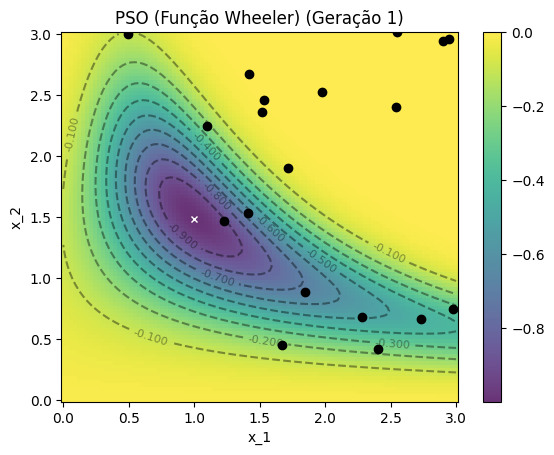

In [8]:
fig, ax = plot_wheeler()

# População de todas gerações
dot_positions = list()
for pop in population_list:
    list_aux = list()
    for particle in pop:
        list_tmp = particle.X
        list_aux.append(list_tmp)
    dot_positions.append(list_aux)
dots = ax.scatter([], [], color='black', marker='o')

# Função para criar animação em gif
def animate(frame):
    # População de cada geração (frame = geração, nesse caso)
    dots_x, dots_y = zip(*dot_positions[frame])

    # Atualiza pontos
    dots.set_offsets(np.c_[dots_x, dots_y])
    # Plota    
    ax.set_title(f'PSO (Função Wheeler) (Geração {frame+1})')
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')

# Cria animação
anim = animation.FuncAnimation(fig, animate, frames=len(dot_positions), interval=100, blit=False)

# Salva animação
anim.save('PSO.gif', writer='pillow', dpi=500, fps=5)